<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 





### **Laboratorio - Parte 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import scipy as sp
from scipy import misc
import sympy as sy

In [2]:
# Valores de tiempo y corriente

d = "https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo"
datos = pd.read_csv(d, sep = ",")
df = datos.drop(columns=["Unnamed: 0"])
df.rename(columns = {'tiempo':'Tiempo'}, inplace = True)
df

,Corriente,Tiempo
0,0.000000,0.00000
1,0.014533,0.10101
2,0.028854,0.20202
3,0.042967,0.30303
4,0.056875,0.40404
...,...,...
95,0.751104,9.59596
96,0.754721,9.69697
97,0.758285,9.79798
98,0.761798,9.89899


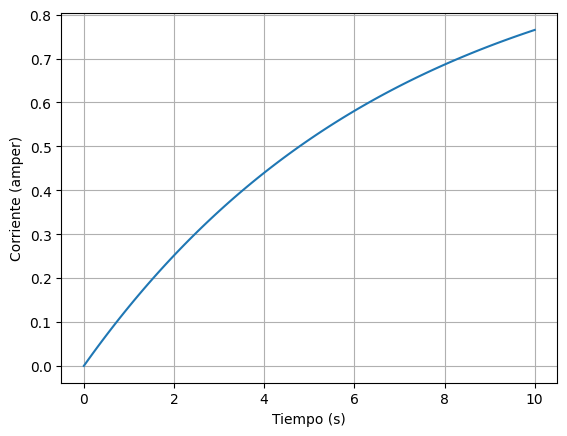

In [3]:
plt.plot(df["Tiempo"], df["Corriente"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (amper)")
plt.grid()

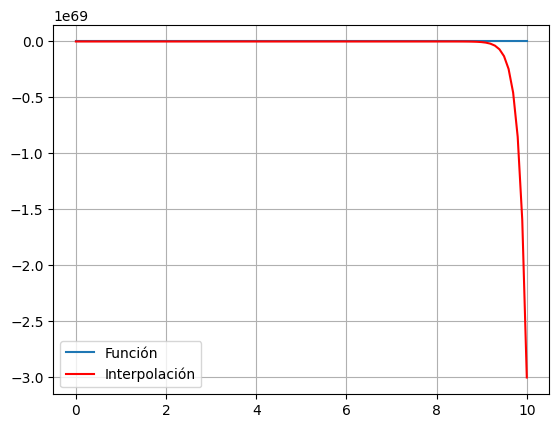

In [4]:
# Interpolación Lagrange

Lagrange = lagrange(df["Tiempo"], df["Corriente"])

plt.plot(df["Tiempo"], df["Corriente"], label = "Función")
plt.plot(df["Tiempo"], Lagrange(df["Tiempo"]), "r-", label = "Interpolación")
plt.legend()
plt.grid()

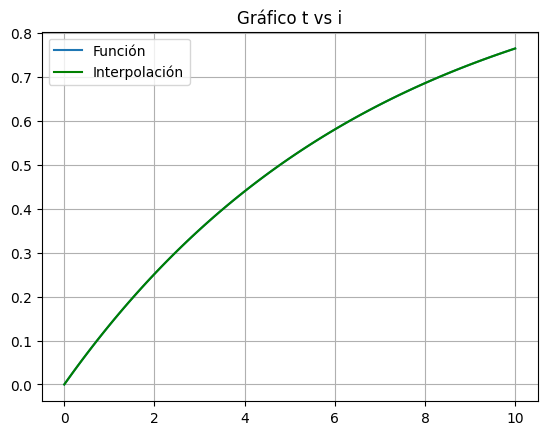

In [12]:
# Interpolacion CubicSpline

interpolacion = CubicSpline(df["Tiempo"], df["Corriente"])

plt.plot(df["Tiempo"], df["Corriente"], label = "Función")
plt.plot(df["Tiempo"], interpolacion(df["Tiempo"]), "g-", label = "Interpolación")
plt.title("Gráfico t vs i")
plt.legend()
plt.grid()

In [6]:
d = misc.derivative(interpolacion, df["Tiempo"], dx = 1)

<ipython-input-6-2b12ef4bdd05>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d = misc.derivative(interpolacion, df["Tiempo"], dx = 1)


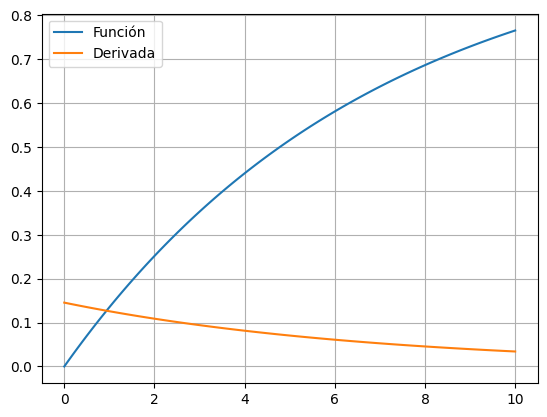

In [7]:
plt.plot(df["Tiempo"], df["Corriente"], label = "Función")
plt.plot(df["Tiempo"], d, label = "Derivada")
plt.legend()
plt.grid()

In [8]:
def voltaje(d):
  L = 0.98 # Herios
  R = 0.142 # ohms
  i = df["Corriente"]
  funcion = L*d + R*i # d es derivada de corriente con respecto del tiempo

  return funcion

voltaje(d)

0     0.142512
1     0.142509
2     0.142505
3     0.142500
4     0.142494
        ...   
95    0.142132
96    0.142130
97    0.142129
98    0.142128
99    0.142127
Name: Corriente, Length: 100, dtype: float64




# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->

# **Código markdown**

### **1. Calcular una integral con regla del trapecio.**

La regla del trapecio se utiliza para aproximar el valor de una integral definida. La fórmula general de la regla del trapecio es:

\begin{equation}
\int_a^b f(x) \, dx \approx \frac{h}{2} \left( f(a) + 2f(x_1) + 2f(x_2) + \ldots + 2f(x_{n-1}) + f(b) \right)
\end{equation}

donde:
 - $h$ es el tamaño del intervalo: $h = \frac{b - a}{n}$
 - $n$ es el número de subintervalos 
 - $x_i$ son los puntos dentro de cada subintervalo.

Esta fórmula se basa en aproximar la función $f(x)$ dentro de cada subintervalo por una función lineal (un trapecio). Luego, se calcula el área de cada trapecio y se suman todas las áreas para obtener una aproximación de la integral definida en el intervalo $[a, b]$.

### **2. Calcular una integral con regla de Simpson.**

La regla de Simpson se utiliza para aproximar el valor de una integral definida. La fórmula general de la regla de Simpson es:

\begin{equation}
\int_a^b f(x) \, dx \approx \frac{h}{3} \left( f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \ldots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right)
\end{equation}

donde:
- $h$ es el tamaño del intervalo: $h = \frac{b - a}{n}$.
- $n$ es el número de subintervalos y debe ser un número par.
- $x_i$ son los puntos dentro de cada subintervalo, y se calculan como $x_i = a + i \cdot h$ para $i = 0, 1, 2, \ldots, n$.

Esta fórmula se basa en aproximar la función $f(x)$ dentro de cada par de subintervalos por una función cuadrática (un polinomio de segundo grado). Luego, se calcula el área bajo cada curva cuadrática y se suma todo para obtener una aproximación de la integral definida en el intervalo $[a, b]$.

### **3. Calcular una integral con regla de cuadratura.**

La regla de cuadratura se utiliza para aproximar el valor de una integral definida. La fórmula general de la regla de cuadratura es:

\begin{equation}
\int_a^b f(x) \, dx \approx \sum_{i=1}^n w_i f(x_i)
\end{equation}

donde:
- $n$ es el número de puntos de cuadratura.
- $w_i$ son los pesos asociados a cada punto de cuadratura.
- $x_i$ son los puntos de cuadratura.


Cada método de cuadratura tiene su propio conjunto de pesos y puntos de cuadratura específicos. Algunos ejemplos populares son la regla del trapecio, la regla de Simpson y la regla de Gauss.

Es importante tener en cuenta que la precisión de la aproximación de la integral depende del número de puntos de cuadratura utilizados y de la elección adecuada de los pesos y puntos de cuadratura para la función $f(x)$ dada.



**4.** Calcular aproximación de las integrales

In [13]:
#@title Librerías
from matplotlib.pyplot import title
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quad
import sympy as sy
import scipy as sp

 $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

In [14]:
def fun1(x1):
  return 1 / np.sqrt(np.tan(x1))

e = 0.0001
x1 = np.linspace(e, (np.pi/2)-e, 1000)

In [15]:
N = 100
ep = 1e-4

@np.vectorize
def int_trapz(N, ep):
  x0 = np.linspace(ep, (np.pi/2)-ep, N)
  area = trapz(fun1(x0), x0)
  return area

In [16]:
ep = np.linspace(1e-6, 1e-3, 100)
t1 = int_trapz(100, ep)
t2 = int_trapz(500, ep)

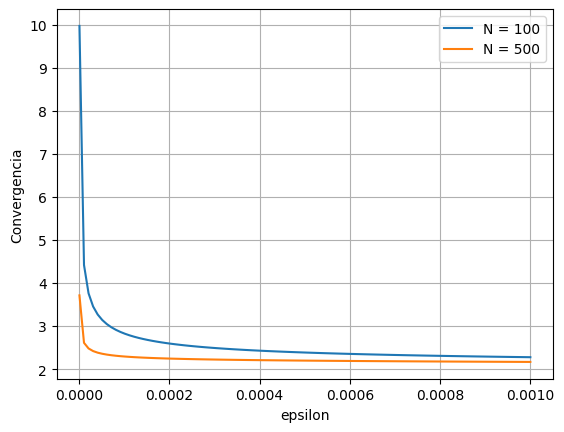

In [17]:
plt.plot(ep, t1, label = "N = 100")
plt.plot(ep, t2, label = "N = 500")
plt.xlabel("epsilon")
plt.ylabel("Convergencia")
plt.legend()
plt.grid()

In [18]:
int1_trapz = trapz(fun1(x1), x1)
print("La integral por el método del trapecio es:", int1_trapz)

int1_simp = simpson(fun1(x1), x1)
print("La integral por el método del Simpson es:", int1_simp)

int1_quad = quad(fun1, 0, np.pi/2)
print("La integral por el método del cuadratura es:", int1_quad[0], "con un error de:", int1_quad[1])

La integral por el método del trapecio es: 2.2389209544224746
La integral por el método del Simpson es: 2.2290274878133514
La integral por el método del cuadratura es: 2.2214414690792026 con un error de: 4.1406478246130973e-10


$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

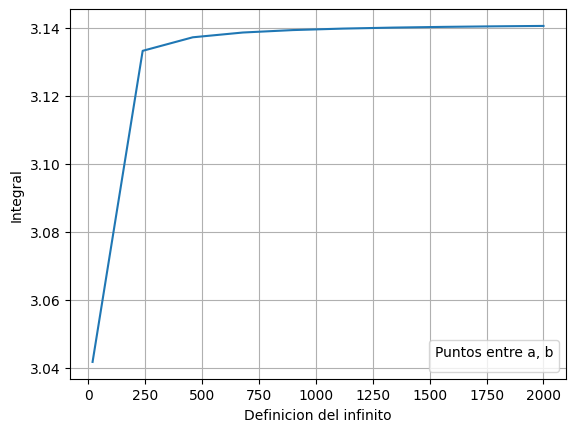

In [19]:
# Ver convergencia de la función 2

f = lambda x: 1/(1+ x**2)
a = np.linspace(20, 2000, 10)

area = []
for a_ in a:
  x = np.linspace(-a_, a_, 100000)
  area.append(trapz(f(x), x))

plt.plot(a, np.array(area)) 
plt.xlabel("Definicion del infinito")
plt.ylabel("Integral")
plt.legend(title = "Puntos entre a, b")
plt.grid()

In [20]:
def fun2(x2):
  return 1 / (1 + x2**2)

x2 = np.linspace(-10000, 10000, 1000000) # valores acordes a la gráfica de convergencia

int2_trapz = trapz(fun2(x2), x2)
print("La integral por el método del trapecio es:", int2_trapz)

int2_simp = simpson(fun2(x2), x2)
print("La integral por el método del Simpson es:", int2_simp)

int2_quad = quad(fun2, -np.inf, np.inf)
print("La integral por el método del cuadratura es:", int2_quad[0], "con un error de:", int2_quad[1])

La integral por el método del trapecio es: 3.1413926535904584
La integral por el método del Simpson es: 3.1413926535904606
La integral por el método del cuadratura es: 3.141592653589793 con un error de: 5.155583041103855e-10


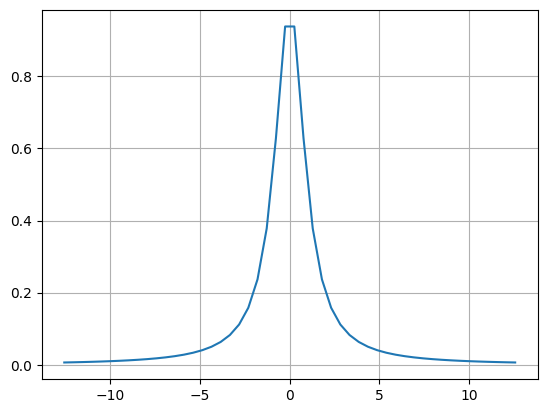

In [36]:
x = np.linspace(-4*np.pi, 4*np.pi)
plt.plot(x, fun2(x))
plt.grid()

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dydx
 $$

In [37]:
a, b = 0, np.pi/4
N=100
x = np.linspace(a, b, N)

def g(y):
  return (2*y*np.sin(x) + np.cos(2*x)**2)

In [38]:
integral_t = np.zeros_like(x)
integral_s = np.zeros_like(x)
for i in range(len(x)):
  y = np.linspace(np.sin(x[i]), np.cos(x[i]), N)
  integral_t[i] = trapz(g(y), y)
  integral_s[i] = simpson(g(y), y)

# Integramos la función resultante en x
integralt = trapz(integral_t, x)
integrals = simpson(integral_s, x)

# Para el método de cuadratura
def f3(y, x):
  return (2*y*np.sin(x) + np.cos(2*x)**2)

def int_q(x):
  return quad(f3, np.sin(x), np.cos(x), args=(x))[0]

integralq, error= quad(int_q, a, b)

In [39]:
print("Método trapecio:", integralt)
print("Método simpson:", integrals)
print('Método cuadratura:',integralq, 'y su error de:', error)

Método trapecio: 0.427555799166781
Método simpson: 0.42755386004751816
Método cuadratura: 0.4256517540566823 y su error de: 4.725683778258131e-15


**Ejercicio de clase**

In [23]:
def f(x):
  return np.log(1 + x**2)

a = 0
b = 1
epsilon = 0.001

In [ ]:
x = np.linspace(0, 1, 100)
integral = trapz(f(x), x)
integral

In [25]:
func = lambda x_ : sy.log(1 + x**2)

x = sy.symbols("x")
f_p2 = sy.diff(func(x), x, 2)
f_p2

2*(-2*x**2/(x**2 + 1) + 1)/(x**2 + 1)

In [26]:
# Se optimiza la función (mínimo de la función)

fprima = sy.lambdify(x, -f_p2, "numpy")
f_ = sy.lambdify(x, func(x), "numpy")
f_op = sp.optimize.fmin_powell(fprima, 2, ftol = 1e-7)
f_op

<ipython-input-26-64b24707d73e>:5: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  f_op = sp.optimize.fmin_powell(fprima, 2, ftol = 1e-7)


array([2])

In [27]:
# Se halla el máximo

x = np.linspace(-1, 1, 100)
max = np.max(fprima(x))
max

-0.0

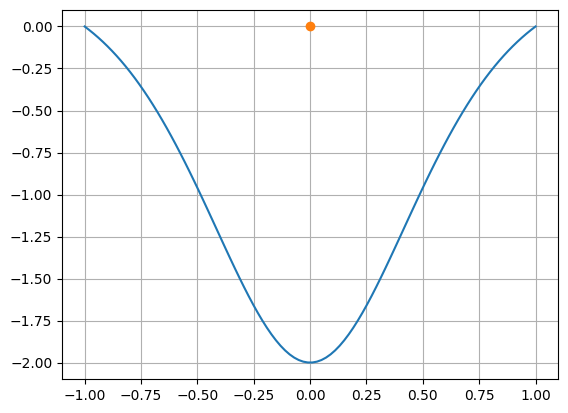

In [34]:
x = np.linspace(-1, 1, 100)
plt.plot(x, fprima(x))
plt.plot(0, max, "o")
plt.grid()

In [29]:
min = sp.optimize.fmin_powell(fprima, 0.1, ftol = 1e-7)
min

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 2
         Function evaluations: 29


array([2.71379983e-09])

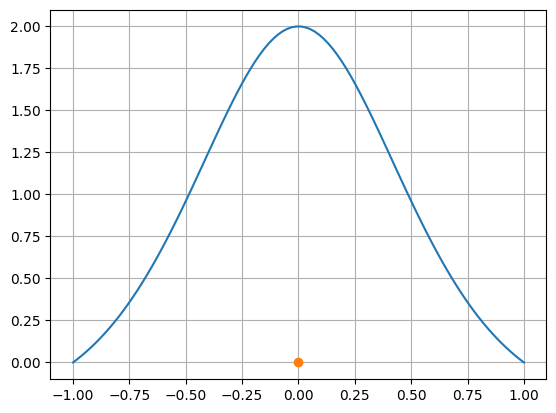

In [35]:
x = np.linspace(-1, 1, 100)
plt.plot(x, -fprima(x))
plt.plot(0, max, "o")
plt.grid()

In [31]:
# error
e = ((1-0) / 12)*max
e

-0.0

In [32]:
h1 = 0.001 / e
h1

<ipython-input-32-1ef8a877f7d2>:1: RuntimeWarning: divide by zero encountered in double_scalars
  h1 = 0.001 / e


-inf

In [33]:
h = np.sqrt(0.006)
print("El tamaño de cada paso es de", h)
print("El número de intervalo es", (b-a)/h)

El tamaño de cada paso es de 0.07745966692414834
El número de intervalo es 12.909944487358056


**5.** Problema 5

In [41]:
k = lambda x, m: 1/np.sqrt(1 - m*np.sin(x)**2)

a = 0
b = np.pi/2
eps = 3e-5

def eliptica(m):
  m1 = 1 - m
  a0,b0 = 1.3862944, 0.5
  a1,b1 = 0.1119723, 0.1213478
  a2,b2 = 0.00725296, 0.0288729
  i= lambda x: k(x, m)
  integral, error = quad(i, a, b)
  polin = a0 + a1*m1 + a2*m1- (b0 + b1*m1 + b2*m1**2)*np.log(m1)+error
  if error <= eps and 0<= m <= 1:
    print('El valor de integral', integral, 'y el valor de la aproximación polinomial es de:', polin)
    print('La diferencia entre la aproximación y el resultado de la integral es de:', np.abs(polin-integral))
    print('El ϵ(m) es de:', error)
  else:
    print('Error, ingrese un número entre el intervalo dado')

m=float(input('Ingrese un número entre 0 y 1: '))
eliptica(m)

Ingrese un número entre 0 y 1: 0.55
El valor de integral 1.8989249102715537 y el valor de la aproximación polinomial es de: 1.8874720182698836
La diferencia entre la aproximación y el resultado de la integral es de: 0.0114528920016701
El ϵ(m) es de: 7.824738633134817e-12


**5.** Problema 6

In [42]:
# Parámetros
a = 1.0
I = 3.0
mu_0 = 1

# Funciones de integración
def K(phi, k_squared):
    return 1 / np.sqrt(1 - k_squared * np.sin(phi)**2)

def E(phi, k_squared):
    return np.sqrt(1 - k_squared * np.sin(phi)**2)

# Función para calcular Aϕ(r, θ)
def calcular_Aphi(r, theta):
  k_squared = (4 * a * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))

  # Cálculo de la integral K(k)
  k_i, error_k = quad(K, 0, np.pi / 2, args=(k_squared,))

  # Cálculo de la integral E(k)
  e_i, error_e = quad(E, 0, np.pi / 2, args=(k_squared,))

  A_phi = (mu_0) * (4*I * a / np.sqrt((a**2 + r**2 + 2 * a * r * np.sin(theta))))*((2 - k_squared) * k_i - 2 * e_i * k_squared)
  return A_phi

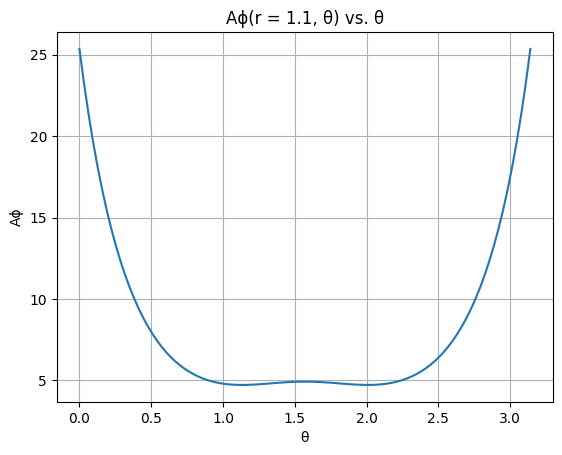

In [43]:
r_value = 1.1
theta_values = np.linspace(0, np.pi, 100)
A_phi_values = [calcular_Aphi(r_value, theta) for theta in theta_values]

plt.plot(theta_values, A_phi_values)
plt.xlabel('θ')
plt.ylabel('Aϕ')
plt.title('Aϕ(r = 1.1, θ) vs. θ')
plt.grid()
plt.show()

<ipython-input-42-08198d3abc4a>:8: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(1 - k_squared * np.sin(phi)**2)
<ipython-input-42-08198d3abc4a>:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  k_i, error_k = quad(K, 0, np.pi / 2, args=(k_squared,))
<ipython-input-42-08198d3abc4a>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - k_squared * np.sin(phi)**2)
<ipython-input-42-08198d3abc4a>:21: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  e_i, error_e = quad(E, 0, np.pi / 2, args=(k_squared,))


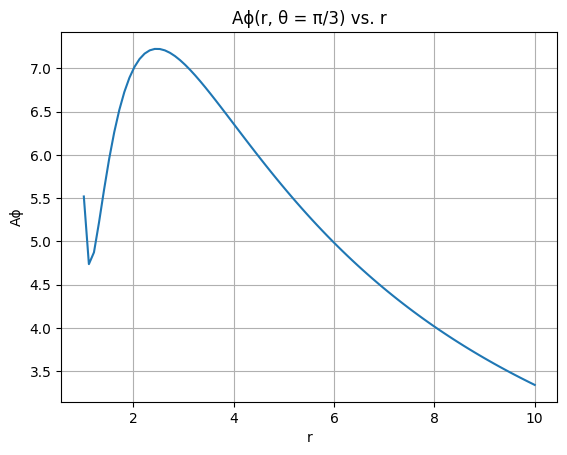

In [44]:
theta_value = np.pi / 3
r_values = np.linspace(0, 10, 100)
A_phi_values = [calcular_Aphi(r, theta_value) for r in r_values]

plt.plot(r_values, A_phi_values)
plt.xlabel('r')
plt.ylabel('Aϕ')
plt.title('Aϕ(r, θ = π/3) vs. r')
plt.grid()
plt.show()